In [1]:
#!/home/akhanal1/Spring2018/pl-env/bin/python3.5
base_dir = 'C:\\Projects\\ature'
import os
os.chdir(base_dir)
import sys
import numpy as np
import itertools as itr
from random import shuffle
from commons.segmentation import AtureTest
from PIL import Image as IMG
from commons.IMAGE import Image, HighResolutionFundusImage
import cv2
import preprocess.utils.filter_utils as filutils
%load_ext autoreload
%autoreload 2

In [198]:
########## PATHS ###########
data_file_path = 'data\\hrf\\images'
mask_path = 'data\\hrf\\mask'
ground_truth_path = 'data\\hrf\\manual1'

def get_mask_file(file_name): 
    return file_name.split('.')[0] + '_mask' + '.tif' 

def get_ground_truth_file(file_name): 
    return file_name.split('.')[0] + '.tif'

input_image = '01_dr.JPG'
########## Paths end

########### PARAMS ##########
BILATERAL_KERNEL_SIZE = 61
BILATERAL_SIGMA_COLOR = 20
BILATERAL_SIGMA_SPACE = 20

kernels1 = filutils.build_filter_bank(k_size=75, gamma=0.7, lambd=10, sigma=4, orientations=64, psi=0)
kernels2 = filutils.build_filter_bank(k_size=75, gamma=0.7, lambd=20, sigma=8, orientations=64, psi=0)
kernels3 = filutils.build_filter_bank(k_size=75, gamma=0.7, lambd=38, sigma=14, orientations=64, psi=0)
kernels = kernels1 + kernels2 + kernels3

params = {'sk_threshold': 80,
          'alpha': 6.0,
          'orig_contrib': 0.8,
          'seg_threshold': 12}
##### Params end

Mask loaded: 01_dr_mask.tif
Ground truth loaded: 01_dr.tif
"apply_bilateral(__)" ... took 4.851 seconds
"apply_gabor(__)" ... took 25.798 seconds


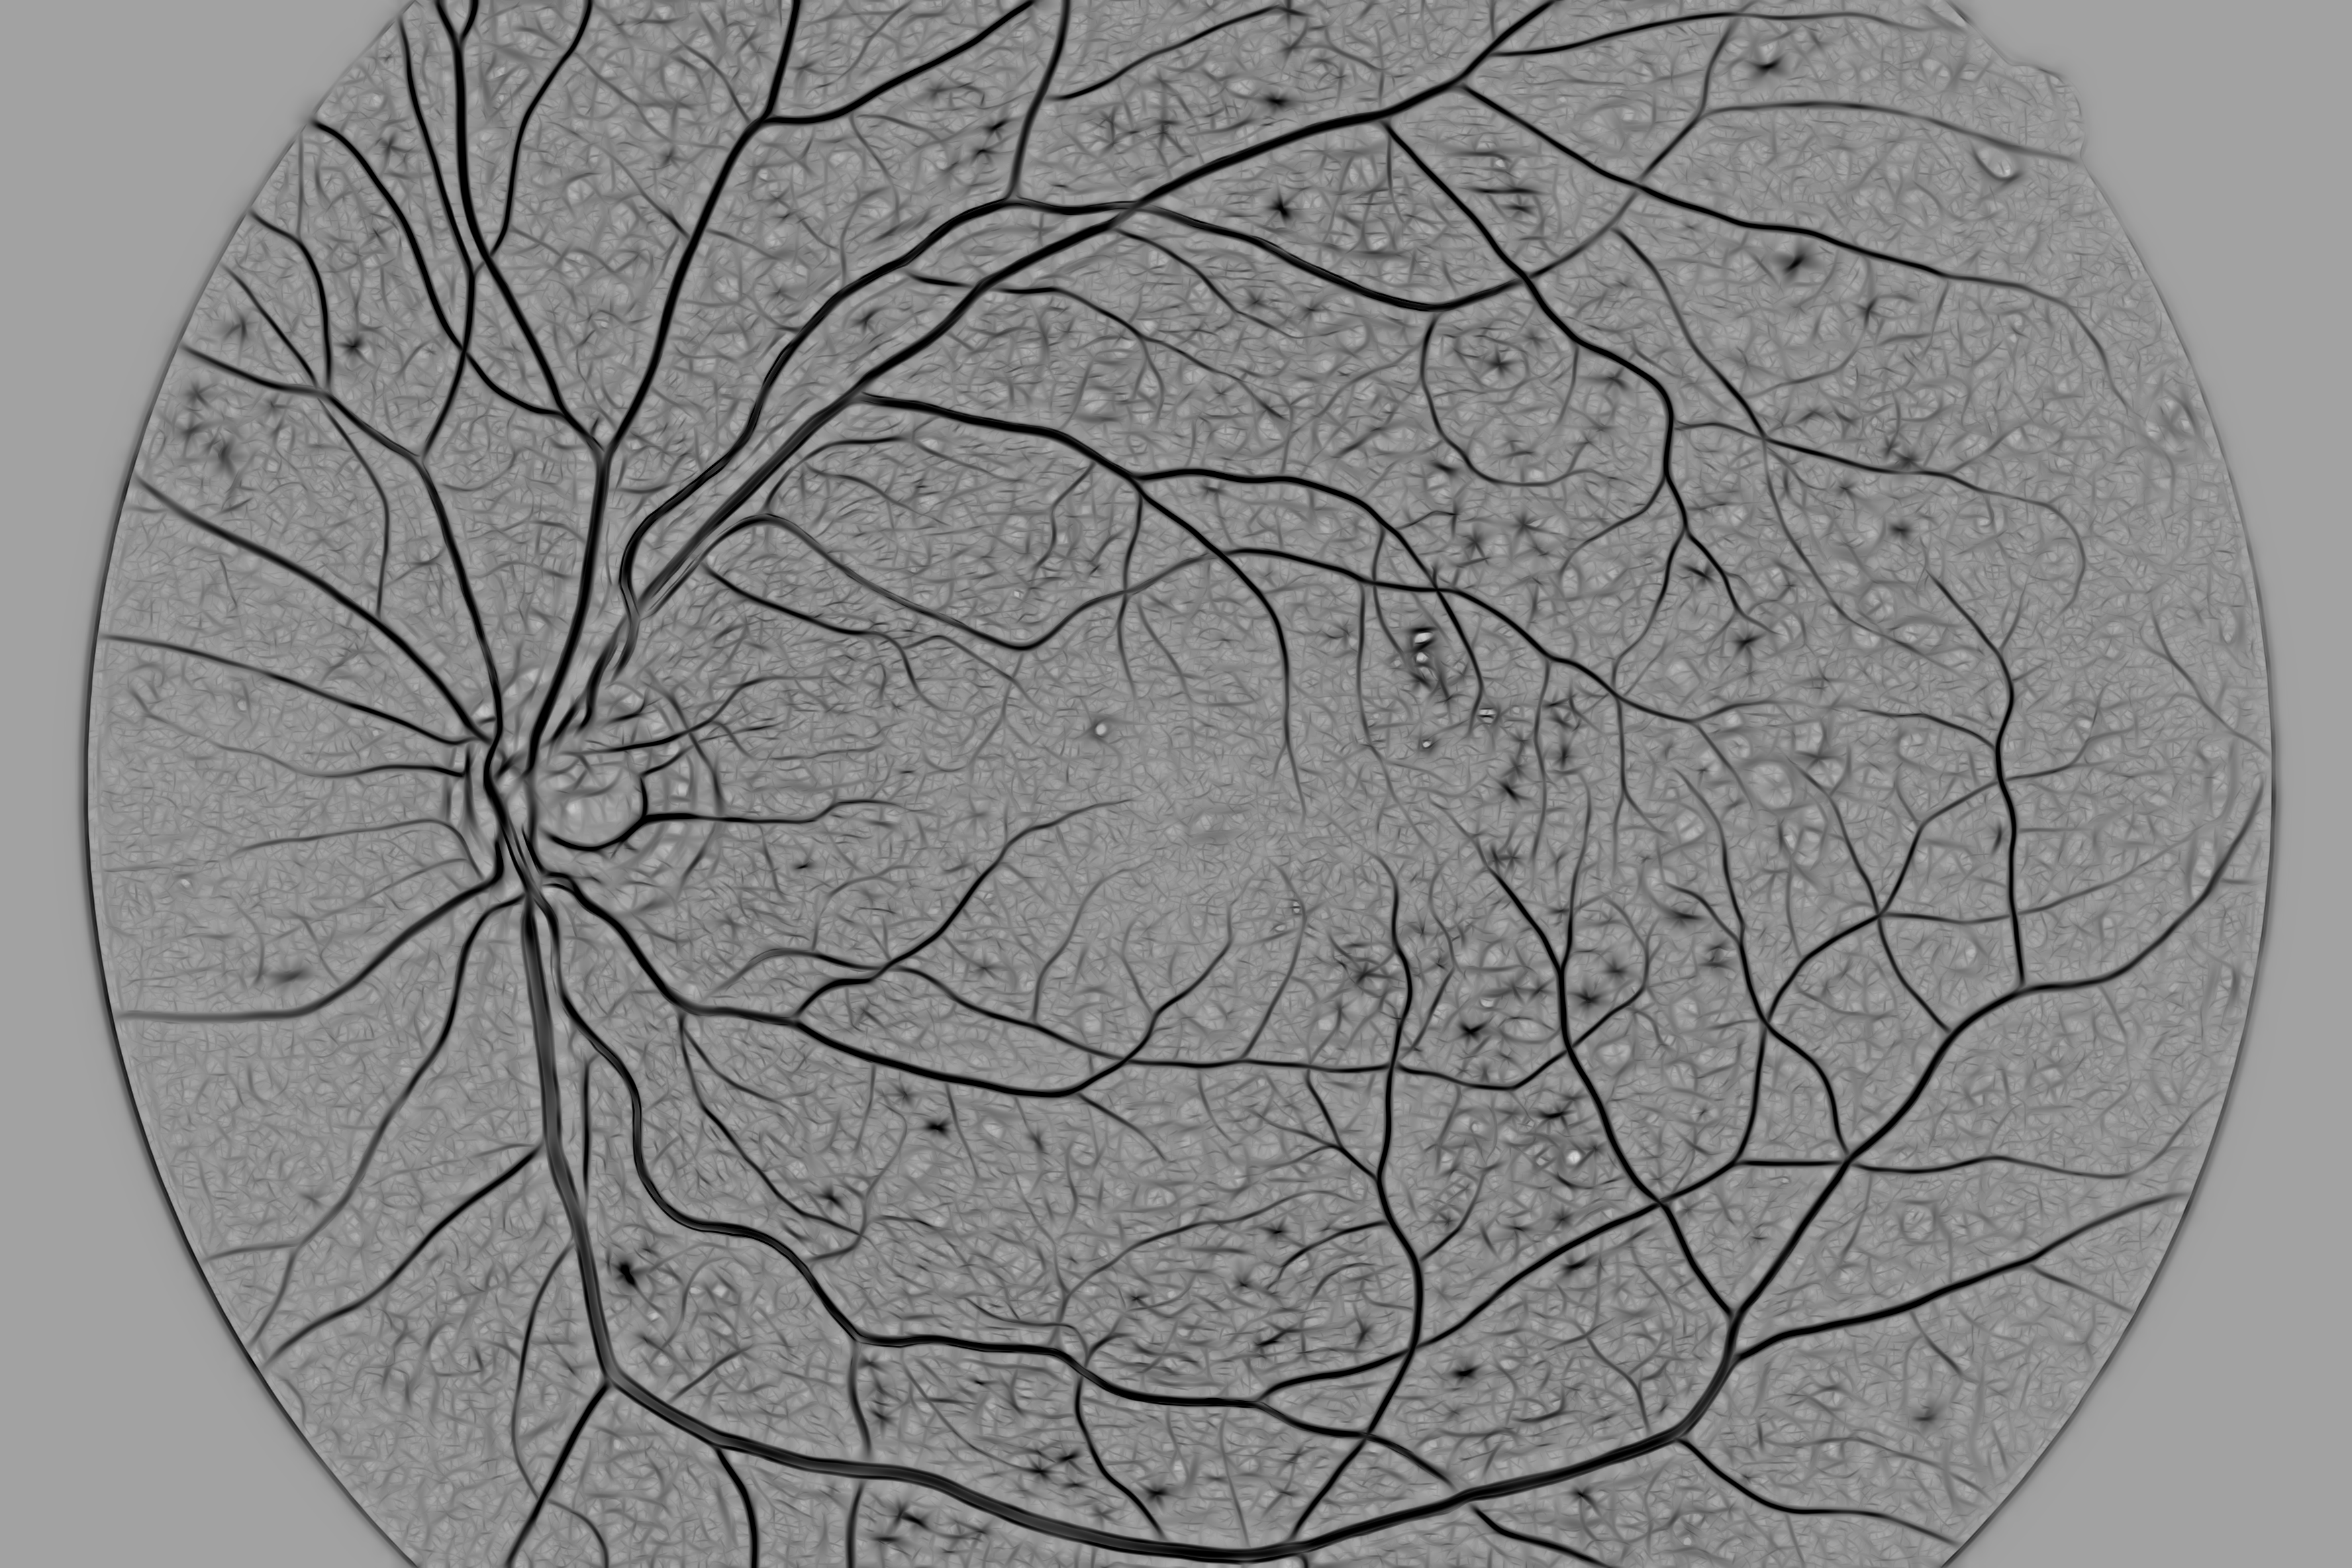

In [199]:
img_obj = HighResolutionFundusImage()

img_obj.load_file(data_dir=data_file_path, file_name=input_image)
img_obj.load_mask(mask_dir=mask_path, fget_mask=get_mask_file, erode=True)
img_obj.load_ground_truth(gt_dir=ground_truth_path, fget_ground_truth=get_ground_truth_file)

img_obj.res['orig'] = img_obj.image_arr[:, :, 1]
img_obj.working_arr = img_obj.image_arr[:, :, 1]

img_obj.apply_mask()
img_obj.apply_bilateral(k_size=BILATERAL_KERNEL_SIZE, sig_color=BILATERAL_SIGMA_COLOR, sig_space=BILATERAL_SIGMA_SPACE)
img_obj.apply_gabor(filter_bank=kernels)

# img_obj.apply_bilateral(k_size=BILATERAL_KERNEL_SIZE, sig_color=BILATERAL_SIGMA_COLOR, sig_space=BILATERAL_SIGMA_SPACE)
# img_obj.working_arr = img_obj.res['bilateral']

# img_obj.generate_skeleton(threshold=params['sk_threshold'])
# img_obj.generate_lattice_graph()
IMG.fromarray(img_obj.res['gabor'])

In [200]:
img_obj.generate_skeleton(threshold=5)

"generate_skeleton(__)" ... took 0.047 seconds


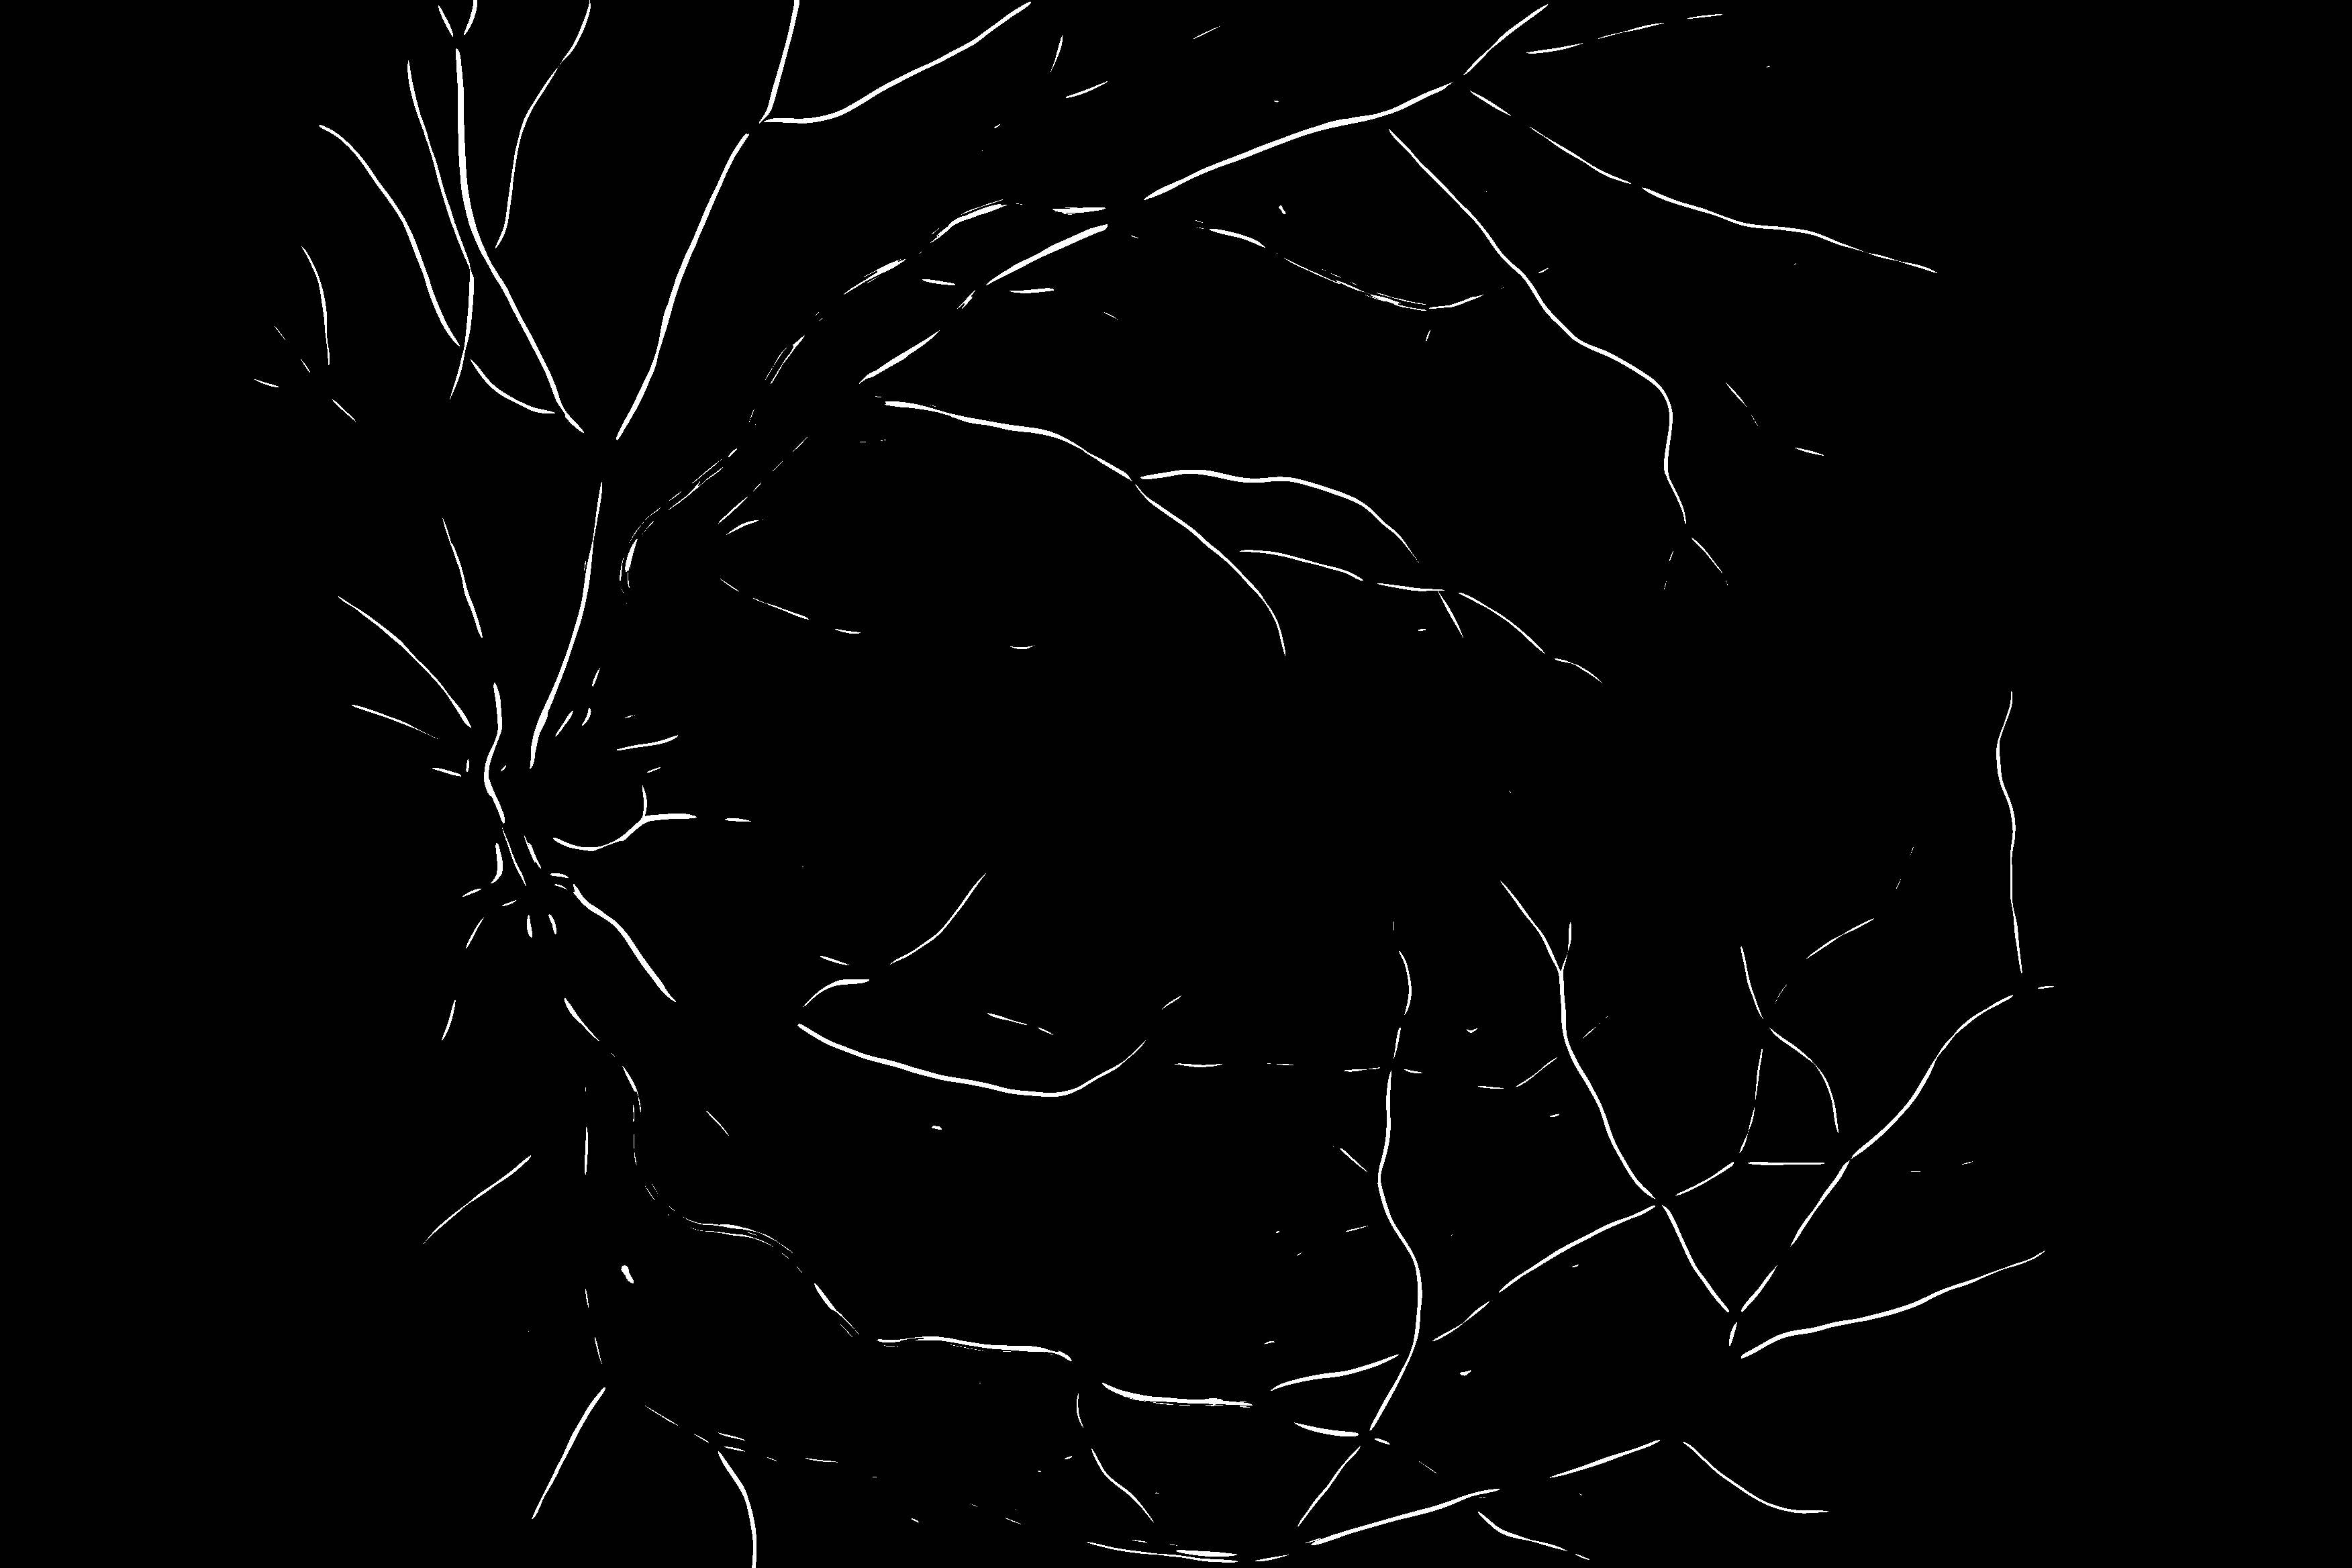

In [201]:
IMG.fromarray(img_obj.res['skeleton'])

In [ ]:
tester = AtureTest(out_dir='out')
acc = tester.run(params=params, save_images=False, img_obj=img_obj)
# tester.run_all(params_combination=all_params)

In [ ]:
### Run for all images in a directory
# tester = AtureTest(data_dir=data_file_path, out_dir=os.path.join('out', 'out_new'))
# tester.run_all(params_combination=all_params)

In [ ]:
IMG.fromarray(img_obj.image_arr)

In [ ]:
IMG.fromarray(img_obj.diff_bilateral)

In [ ]:
IMG.fromarray(img_obj.img_gabor)

In [ ]:
IMG.fromarray(255-acc.res['skeleton0'])

In [ ]:
IMG.fromarray(acc.res['segmented0'])

In [ ]:
print(acc.res['scores0'])

In [ ]:
print(acc.res['params0'])

In [ ]:
IMG.fromarray(acc.res['segmented_rgb0'])

In [ ]:
import preprocess.utils.img_utils as ig

In [ ]:
ig.histogram(acc.img_obj.img_gabor, bins=30)

In [ ]:
fni = np.full(acc.arr_2d.shape, 250, dtype=np.uint8)
for i in range(fni.shape[0]):
    for j in range(fni.shape[1]):
        if acc.arr_2d[i,j] == 0 and acc.img_obj.ground_truth[i,j] == 255:
            fni[i, j] = acc.img_obj.img_gabor[i,j]

In [7]:
img_obj.working_arr.shape

(2336, 3504)